In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [5]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [6]:
df = df.drop('DRK_YN',axis=1)

In [7]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0


In [8]:
df = pd.get_dummies(df,drop_first=True)
df

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,sex_Male
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,True
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,True
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,True
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,True
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,80.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,True
991342,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,83.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,True
991343,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,70.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,False
991344,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,74.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,True


<Axes: >

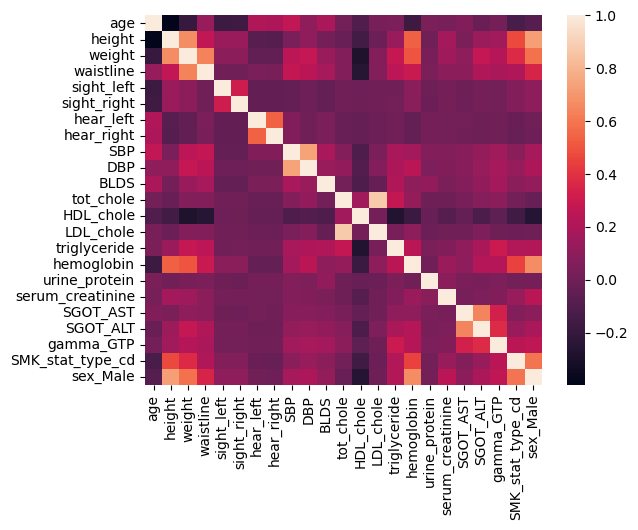

In [9]:
sns.heatmap(df.corr())

In [10]:
x = df.drop('SMK_stat_type_cd',axis=1)
y=df['SMK_stat_type_cd']
y

0         1.0
1         3.0
2         1.0
3         1.0
4         1.0
         ... 
991341    1.0
991342    1.0
991343    3.0
991344    1.0
991345    3.0
Name: SMK_stat_type_cd, Length: 991346, dtype: float64

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=101,test_size=0.2)

In [11]:
scaler = StandardScaler()
s_xtrain = scaler.fit_transform(xtrain)
s_xtest = scaler.transform(xtest)

Using Logistic Regression

In [12]:
model = LogisticRegression(max_iter=10000,solver='saga',)
model.fit(s_xtrain,ytrain)

LogisticRegression(max_iter=10000, solver='saga')

In [13]:
lr_preds = model.predict(s_xtest)
accuracy_score(ytest,lr_preds)

0.6786099762949513

Using SVMs

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X=s_xtrain,y=ytrain)

In [ ]:
svcpreds = svc.predict(s_xtest)
accuracy_score(ytest,svcpreds)

SVMs cannot train on this dataset

Using Decision Tree Classifier

In [14]:
dt = DecisionTreeClassifier()
dt.fit(s_xtrain,ytrain)

DecisionTreeClassifier()

In [15]:
dt_preds = dt.predict(s_xtest)
accuracy_score(ytest,dt_preds)

0.619291874716296

Using Random Forests

In [16]:
rf = RandomForestClassifier()
rf.fit(s_xtrain,ytrain)

RandomForestClassifier()

In [17]:
rf_preds = rf.predict(s_xtest)
accuracy_score(ytest,rf_preds)

0.6933121500983508